In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import os
from termcolor import colored
from scipy import stats
import plotly.express as px
from plotly.figure_factory import create_scatterplotmatrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [183]:
data = pd.read_csv("/content/diabetes_data.csv")

X = data.drop('Diabetes', axis=1)
y = data['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

In [184]:
## Modelo com todas as covariáveis

model1 = smf.glm(formula = 'Diabetes ~ Age + Sex + HighChol + CholCheck + BMI + Smoker + HeartDiseaseorAttack + PhysActivity + Fruits + Veggies + HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + DiffWalk + Stroke + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model1.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 1: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 1: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 1: ', accuracy_score(data_test['Diabetes'], y_pred))

confusion_matrix(y_test, y_pred)

Recall modelo 1:  0.7728605200945626
Precision modelo 1:  0.7403079710144927
Accuracy modelo 1:  0.7515560165975104


array([[7766, 2867],
       [2402, 8173]])

In [185]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.15

model2 = smf.glm(formula = 'Diabetes ~ Age + HighChol + BMI + HeartDiseaseorAttack + PhysActivity + GenHlth + PhysHlth + DiffWalk + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model2.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 2: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 2: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 2: ', accuracy_score(data_test['Diabetes'], y_pred))

confusion_matrix(y_test, y_pred)

Recall modelo 2:  0.7672813238770686
Precision modelo 2:  0.7366987470492101
Accuracy modelo 2:  0.7472180309317239


array([[7733, 2900],
       [2461, 8114]])

In [186]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.1

model3 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + HeartDiseaseorAttack + PhysActivity + GenHlth + PhysHlth + DiffWalk + Stroke + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model3.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 3: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 3: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 3: ', accuracy_score(data_test['Diabetes'], y_pred))

confusion_matrix(y_test, y_pred)

Recall modelo 3:  0.7708747044917258
Precision modelo 3:  0.7373371924746743
Accuracy modelo 3:  0.7488211995473406


array([[7729, 2904],
       [2423, 8152]])

In [187]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.15 e considerando a alta correlação de GenHlth e PhysHlth

model4 = smf.glm(formula = 'Diabetes ~ Age + HighChol + BMI + HeartDiseaseorAttack + PhysActivity + GenHlth*PhysHlth + DiffWalk + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model4.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 4: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 4: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 4: ', accuracy_score(data_test['Diabetes'], y_pred))

confusion_matrix(y_test, y_pred)

Recall modelo 4:  0.7695508274231678
Precision modelo 4:  0.7344765342960289
Accuracy modelo 4:  0.7463692946058091


array([[7691, 2942],
       [2437, 8138]])

In [188]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07

model5 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + Smoker + HeartDiseaseorAttack + PhysActivity + Veggies + HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + DiffWalk + Stroke + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model5.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 5: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 5: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 5: ', accuracy_score(data_test['Diabetes'], y_pred))

confusion_matrix(y_test, y_pred)

Recall modelo 5:  0.7728605200945626
Precision modelo 5:  0.7395710795403131
Accuracy modelo 5:  0.7510373443983402


array([[7755, 2878],
       [2402, 8173]])

In [189]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07 e considerando a alta correlação de GenHlth e PhysHlth

model6 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + Smoker + HeartDiseaseorAttack + PhysActivity + Veggies + HvyAlcoholConsump + MentHlth + GenHlth*PhysHlth + DiffWalk + Stroke + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model6.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 6: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 6: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 6: ', accuracy_score(data_test['Diabetes'], y_pred))

confusion_matrix(y_test, y_pred)

Recall modelo 6:  0.775791962174941
Precision modelo 6:  0.738168076300162
Accuracy modelo 6:  0.7509901923802339


array([[7723, 2910],
       [2371, 8204]])

In [190]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07 e considerando a alta correlação de GenHlth, PhysHlth e DiffWalk

model8 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + Smoker + HeartDiseaseorAttack + PhysActivity + Veggies + HvyAlcoholConsump + MentHlth + GenHlth*PhysHlth*DiffWalk + Stroke + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model8.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 8: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 8: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 8: ', accuracy_score(data_test['Diabetes'], y_pred))

confusion_matrix(y_test, y_pred)

Recall modelo 8:  0.7771158392434988
Precision modelo 8:  0.7367099955177051
Accuracy modelo 8:  0.750377216144851


array([[7696, 2937],
       [2357, 8218]])

In [191]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07 e considerando a alta correlação de GenHlth, PhysHlth, DiffWalk e MentHlth

model9 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + Smoker + HeartDiseaseorAttack + PhysActivity + Veggies + HvyAlcoholConsump + MentHlth*GenHlth*PhysHlth*DiffWalk + Stroke + HighBP', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model9.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 9: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 9: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 9: ', accuracy_score(data_test['Diabetes'], y_pred))

confusion_matrix(y_test, y_pred)

Recall modelo 9:  0.7778723404255319
Precision modelo 9:  0.7374271627073061
Accuracy modelo 9:  0.751131648434553


array([[7704, 2929],
       [2349, 8226]])

In [192]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07 e considerando a alta correlação de GenHlth, PhysHlth, DiffWalk, MentHlth e HighBP

model10 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + Smoker + HeartDiseaseorAttack + PhysActivity + Veggies + HvyAlcoholConsump + MentHlth*GenHlth*PhysHlth*DiffWalk*HighBP + Stroke', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model10.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 10: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 10: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 10: ', accuracy_score(data_test['Diabetes'], y_pred))

confusion_matrix(y_test, y_pred)

Recall modelo 10:  0.7891252955082743
Precision modelo 10:  0.7318249583442954
Accuracy modelo 10:  0.7506601282534893


array([[7575, 3058],
       [2230, 8345]])

In [193]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07 e considerando a alta correlação de GenHlth, PhysHlth, DiffWalk, MentHlth, HighBP e BMI

model11 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + Smoker + HeartDiseaseorAttack + PhysActivity + Veggies + HvyAlcoholConsump +  BMI*MentHlth*GenHlth*PhysHlth*DiffWalk*HighBP + Stroke', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model11.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 11: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 11: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 11: ', accuracy_score(data_test['Diabetes'], y_pred))

confusion_matrix(y_test, y_pred)

Recall modelo 11:  0.7878959810874705
Precision modelo 11:  0.7320330346160604
Accuracy modelo 11:  0.7504243681629573


array([[7583, 3050],
       [2243, 8332]])

In [194]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07 e considerando a alta correlação de GenHlth, PhysHlth, DiffWalk, MentHlth, HighBP e HeartDiseaseorAttack

model12 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + Smoker  + PhysActivity + Veggies + HvyAlcoholConsump +  HeartDiseaseorAttack*MentHlth*GenHlth*PhysHlth*DiffWalk*HighBP + Stroke', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model12.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 12: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 12: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 12: ', accuracy_score(data_test['Diabetes'], y_pred))

confusion_matrix(y_test, y_pred)

Recall modelo 12:  0.7928132387706855
Precision modelo 12:  0.7315242997993194
Accuracy modelo 12:  0.7516031686156167


array([[7556, 3077],
       [2191, 8384]])

In [216]:
## Modelo com as covariáveis que possuem valor absoluto de correlação maiores que 0.07 e considerando a alta correlação de GenHlth, PhysHlth, DiffWalk, MentHlth, HighBP e o absoluto de PhysActivity

model13 = smf.glm(formula = 'Diabetes ~ Age + HighChol + CholCheck + BMI + Smoker + Veggies + HvyAlcoholConsump + PhysActivity*HeartDiseaseorAttack*MentHlth*GenHlth*PhysHlth*DiffWalk*HighBP + Stroke', data = data_train, family=sm.families.Binomial()).fit()

y_proba = model13.predict(data_test)
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

print('Recall modelo 13: ', recall_score(data_test['Diabetes'], y_pred))
print('Precision modelo 13: ', precision_score(data_test['Diabetes'], y_pred))
print('Accuracy modelo 13: ', accuracy_score(data_test['Diabetes'], y_pred))

from sklearn.metrics import f1_score

f1 = f1_score(data_test['Diabetes'], y_pred)
print(f1)
confusion_matrix(y_test, y_pred)

Recall modelo 13:  0.7913947990543735
Precision modelo 13:  0.7307893817673768
Accuracy modelo 13:  0.7506129762353829
0.7598855949516502


array([[7550, 3083],
       [2206, 8369]])

In [203]:
print('AIC do modelo 1: {}'.format(model1.aic))
print('AIC do modelo 2: {}'.format(model2.aic))
print('AIC do modelo 3: {}'.format(model3.aic))
print('AIC do modelo 4: {}'.format(model4.aic))
print('AIC do modelo 5: {}'.format(model5.aic))
print('AIC do modelo 6: {}'.format(model6.aic))
print('AIC do modelo 8: {}'.format(model8.aic))
print('AIC do modelo 9: {}'.format(model9.aic))
print('AIC do modelo 10: {}'.format(model10.aic))
print('AIC do modelo 11: {}'.format(model11.aic))
print('AIC do modelo 12: {}'.format(model12.aic))
print('AIC do modelo 13: {}'.format(model13.aic))

AIC do modelo 1: 51100.68980748429
AIC do modelo 2: 51608.11792675082
AIC do modelo 3: 51376.05139294856
AIC do modelo 4: 51456.053333857024
AIC do modelo 5: 51196.6799019811
AIC do modelo 6: 51048.26126348568
AIC do modelo 8: 50999.45411976286
AIC do modelo 9: 50997.03371063964
AIC do modelo 10: 50924.65900120046
AIC do modelo 11: 50933.21653636346
AIC do modelo 12: 50903.40292405176
AIC do modelo 13: 50968.44585534547


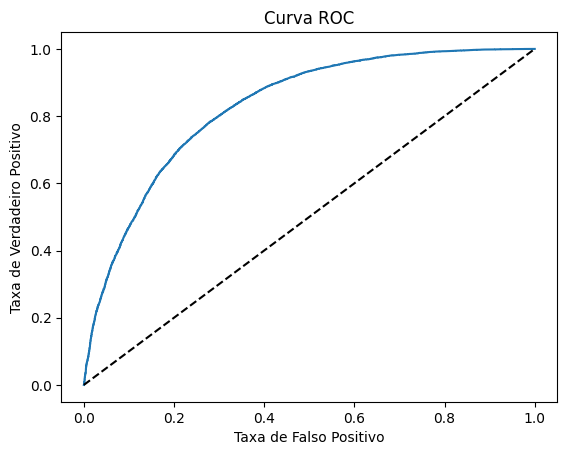

0.8283993295327741


In [210]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = model10.predict(data_test)

fpr10, tpr10, thresholds = roc_curve(data_test['Diabetes'], y_proba)

area10 = roc_auc_score(data_test['Diabetes'], y_proba)

plt.plot(fpr10, tpr10)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.show()

print(area10)

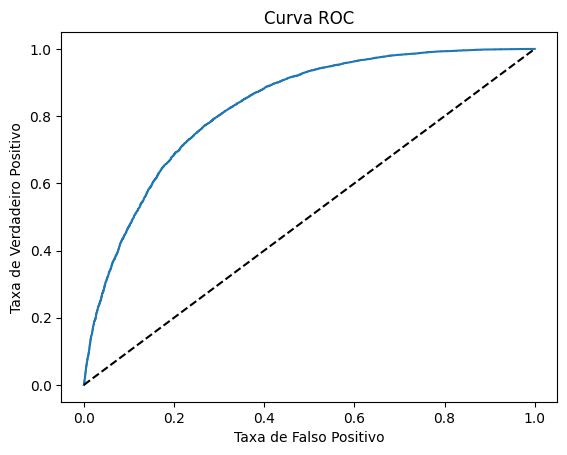

0.828707900979132


In [211]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = model12.predict(data_test)

fpr12, tpr12, thresholds = roc_curve(data_test['Diabetes'], y_proba)

area12 = roc_auc_score(data_test['Diabetes'], y_proba)

plt.plot(fpr12, tpr12)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.show()

print(area12)

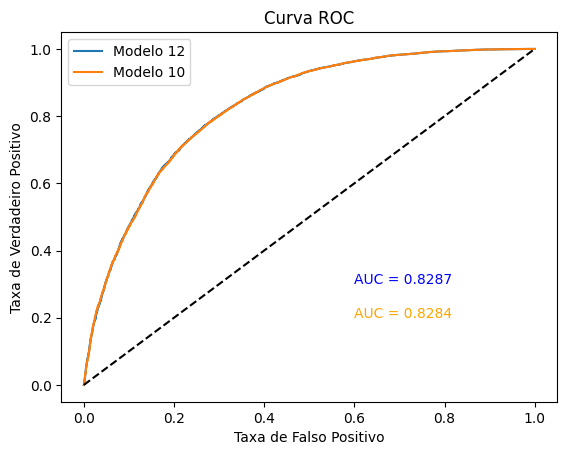

In [212]:
plt.plot(fpr12, tpr12)
plt.plot(fpr10, tpr10)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(['Modelo 12', 'Modelo 10'])
plt.text(0.6, 0.3, 'AUC = %0.4f' % area12, color='blue')
plt.text(0.6, 0.2, 'AUC = %0.4f' % area10, color='orange')

plt.show()